```{contents}
```

# DIfferential Calculus

* Slope is a measure of how steep a line is.
* It represents the **rate of change of one variable with respect to another**.
* Understanding slope is foundational for **derivatives**, which are crucial in **data science and machine learning**.

---

## Slope in 2D Cartesian Coordinates

* For a straight line through points $(X_1, Y_1)$ and $(X_2, Y_2)$:

$$
\text{slope} = m = \frac{Y_2 - Y_1}{X_2 - X_1} = \frac{\Delta Y}{\Delta X} = \frac{\text{rise}}{\text{run}}
$$

* **Rise:** Vertical change ($Y_2 - Y_1$)
* **Run:** Horizontal change ($X_2 - X_1$)

---

## Types of Slope

1. **Positive Slope ($m>0$)**

   * Line rises left to right.
   * Steeper line → larger slope.

2. **Negative Slope ($m<0$)**

   * Line falls left to right.
   * More negative → steeper downward line.

3. **Zero Slope ($m=0$)**

   * Line is horizontal.
   * No vertical change.

4. **Undefined Slope**

   * Line is vertical ($X_2 = X_1$) → division by zero.

---

## Examples

* Positive slope: $(1,2)$ to $(3,6)$ → $m = 2$ → line rises 2 units vertically for every 1 unit horizontally.
* Negative slope: $(2,5)$ to $(6,3)$ → $m = -0.5$ → line falls 0.5 units vertically for every 1 unit horizontally.
* Zero slope: $(1,4)$ to $(5,4)$ → $m = 0$ → horizontal line.
* Undefined slope: $(3,2)$ to $(3,7)$ → vertical line → slope undefined.

---

## Equation of a Line

* General form:

$$
y = mx + b
$$

* $m$ → slope of the line
* $b$ → y-intercept (where line crosses y-axis)
* Example: $y = 2x - 3$

---

## Non-linear Lines

* For curves, slope is **not constant**.
* Steepness varies at different points.
* This motivates the concept of **derivative**, which measures **instantaneous rate of change** at a point.

---

**Key Takeaways**

* Slope = rate of change = rise/run.
* Types: positive, negative, zero, undefined.
* Straight lines → constant slope, curves → variable slope.
* Slope is fundamental for understanding **derivatives** in machine learning.

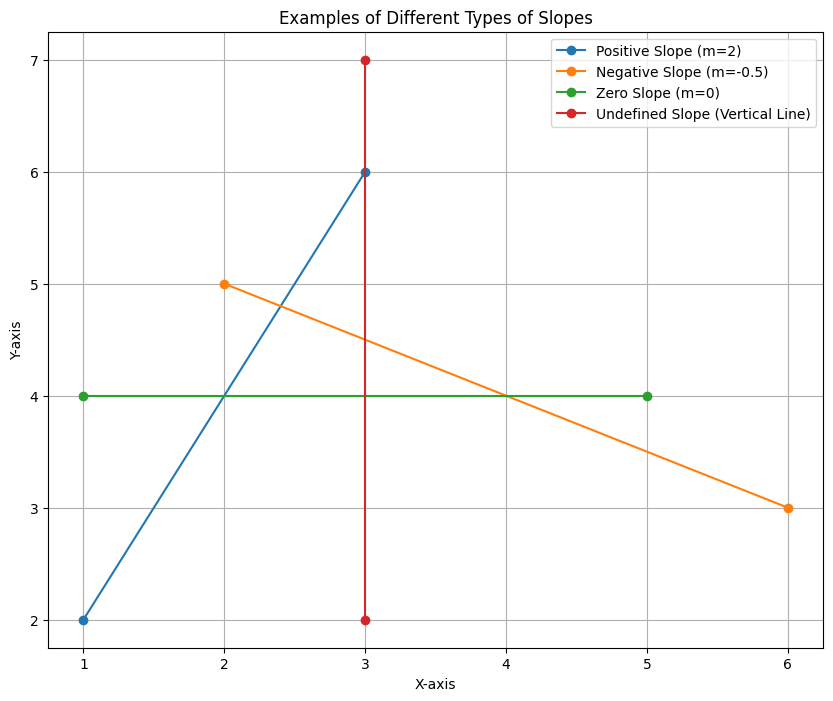

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure
plt.figure(figsize=(10, 8))

# Positive slope
x_pos = np.array([1, 3])
y_pos = np.array([2, 6])
plt.plot(x_pos, y_pos, marker='o', label='Positive Slope (m=2)')

# Negative slope
x_neg = np.array([2, 6])
y_neg = np.array([5, 3])
plt.plot(x_neg, y_neg, marker='o', label='Negative Slope (m=-0.5)')

# Zero slope
x_zero = np.array([1, 5])
y_zero = np.array([4, 4])
plt.plot(x_zero, y_zero, marker='o', label='Zero Slope (m=0)')

# Undefined slope (vertical line)
x_undef = np.array([3, 3])
y_undef = np.array([2, 7])
plt.plot(x_undef, y_undef, marker='o', label='Undefined Slope (Vertical Line)')

# Labels and legend
plt.title("Examples of Different Types of Slopes")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)
plt.legend()
plt.show()


##  Derivatives

1. **Slope of a Line**

   * For a straight line $y = mx + c$, the slope is constant.
   * Slope formula:

     $$
     \text{slope} = \frac{\Delta y}{\Delta x} = \frac{y_2 - y_1}{x_2 - x_1}
     $$

2. **Slope of a Curve**

   * For a curve $y = f(x)$, the slope varies at different points.
   * **Secant line:** A line connecting two points on the curve. Slope gives **average rate of change** between the points.
   * **Tangent line:** A line touching the curve at a single point. Slope gives **instantaneous rate of change** at that point.

3. **Instantaneous Rate of Change**

   * To find the slope at a single point:

     1. Draw secant lines between two points.
     2. Gradually move one point closer to the other.
     3. As the points coincide, the secant line becomes the tangent line.
     4. Slope of the tangent line is the derivative at that point.

4. **Derivative Notation**

   * Denoted as:

     $$
     \frac{dy}{dx}
     $$
   * Represents the slope of the tangent line at a specific point $x$.

**Key Concept**

   * Derivative is the **instantaneous rate of change** of $y$ with respect to $x$.
   * Calculating derivatives requires the concept of **limits**, which is how secant lines approach a tangent.



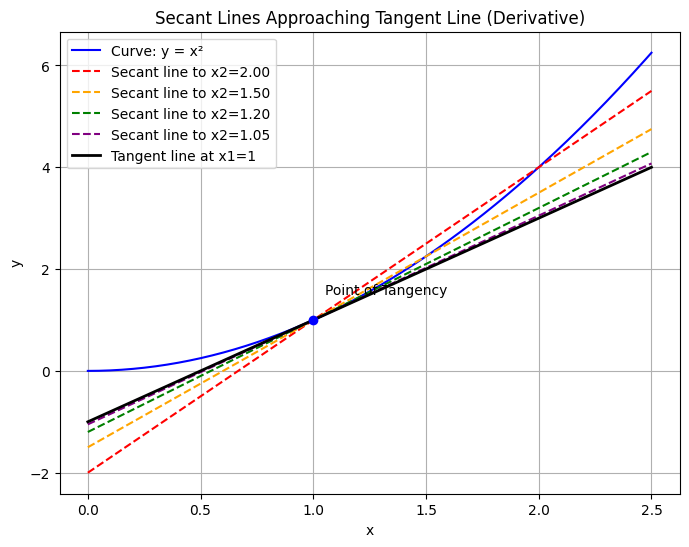

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x):
    return x**2

# Points for secant lines
x1 = 1.0
x2_values = [2.0, 1.5, 1.2, 1.05]  # moving x2 closer to x1

x = np.linspace(0, 2.5, 300)
y = f(x)

plt.figure(figsize=(8,6))
plt.plot(x, y, label='Curve: y = x²', color='blue')

colors = ['red', 'orange', 'green', 'purple']
for i, x2 in enumerate(x2_values):
    y1 = f(x1)
    y2 = f(x2)
    slope = (y2 - y1) / (x2 - x1)
    y_secant = y1 + slope*(x - x1)
    plt.plot(x, y_secant, linestyle='--', color=colors[i], 
             label=f'Secant line to x2={x2:.2f}')

# Tangent line at x1
slope_tangent = 2*x1  # derivative of x^2
y_tangent = f(x1) + slope_tangent*(x - x1)
plt.plot(x, y_tangent, color='black', linewidth=2, label='Tangent line at x1=1')

plt.scatter([x1], [f(x1)], color='blue', zorder=5)
plt.text(x1+0.05, f(x1)+0.5, 'Point of Tangency', fontsize=10)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Secant Lines Approaching Tangent Line (Derivative)')
plt.legend()
plt.grid(True)
plt.show()


* **Blue curve**: $y = x^2$
* **Dashed lines (red, orange, green, purple)**: Secant lines connecting $x_1 = 1$ to points gradually approaching $x_1$
* **Black line**: Tangent line at $x_1 = 1$, representing the instantaneous slope (derivative)


## Calculating Derivatives at a Specific Point

1. **Introduction:**

   * Recap of the previous discussion: derivative as the slope of the tangent at a point.
   * Focus of this video: solving a problem to calculate a derivative at a specific point using limits.

2. **Problem Setup:**

   * Function considered: $f(x) = x^2$.
   * Plot a parabolic curve representing the function.
   * Goal: find the derivative at a given point $x$.

3. **Method:**

   * Select a point on the curve $(x, x^2)$.
   * Take another point $(x+h, (x+h)^2)$ to form a **secant line**.
   * Use the derivative definition:

     $$
     f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}
     $$

4. **Calculation:**

   * Expand $(x+h)^2 = x^2 + 2xh + h^2$
   * Simplify the difference: $x^2 + 2xh + h^2 - x^2 = 2xh + h^2$
   * Factor out $h$ and divide: $\frac{2xh + h^2}{h} = 2x + h$
   * Take the limit as $h \to 0$: $f'(x) = 2x$

5. **Result:**

   * The derivative of $x^2$ is $f'(x) = 2x$.
   * For a specific point $x = 9$: $f'(9) = 18$ (slope of tangent at $x=9$).

6. **Conclusion:**

   * Derivatives can be calculated for any point using the limit method.
   * The general rule for $f(x) = x^n$ is $f'(x) = n x^{n-1}$.
   * Understanding derivatives through limits reinforces the concept of slope at a point.



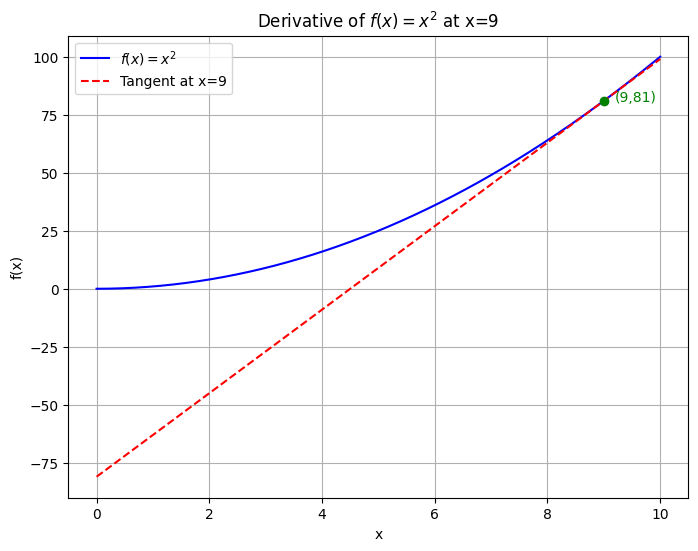

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its derivative
def f(x):
    return x**2

def f_prime(x):
    return 2*x

# Points
x = np.linspace(0, 10, 400)
y = f(x)

# Specific point to show tangent
x0 = 9
y0 = f(x0)

# Tangent line at x0
tangent = f_prime(x0)*(x - x0) + y0

# Plotting
plt.figure(figsize=(8,6))
plt.plot(x, y, label='$f(x) = x^2$', color='blue')
plt.plot(x, tangent, '--', label=f'Tangent at x={x0}', color='red')
plt.scatter([x0], [y0], color='green', zorder=5)
plt.text(x0+0.2, y0, f'({x0},{y0})', fontsize=10, color='green')
plt.title('Derivative of $f(x) = x^2$ at x=9')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()


Here’s the plot showing $f(x) = x^2$ (blue curve) and the tangent line at $x = 9$ (red dashed line). The green point marks $(9, 81)$, illustrating the slope of the tangent, which is the derivative $f'(9) = 18$.


## Power Rule for Derivatives

### Recap of Derivative Formula

* Derivative at a point:

$$
f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}
$$

* Derivative represents the **slope of the tangent** to the curve at any point.

---

### Polynomial Functions

* Polynomial examples:

$$
f(x) = x^2 + 3, \quad f(x) = x^3, \quad f(x) = x^2 + 2x + 1
$$

* These produce curves of different shapes depending on the powers and coefficients.

---

### Derivative of a Constant

* If $f(x) = c$ (a constant):

$$
f'(x) = 0
$$

* Graphically: a horizontal line has **zero slope** because there is no vertical change.

---

### Power Rule (for $f(x) = x^n, n \neq 0$)

* Formula:

$$
\frac{d}{dx} x^n = n \cdot x^{n-1}
$$

* Applies to **polynomial expressions**, including negative powers.
* Constant multiples follow the rule:

$$
\frac{d}{dx} [k \cdot x^n] = k \cdot n \cdot x^{n-1}
$$

---

**Examples**

1. $f(x) = x^3$

$$
f'(x) = 3x^2, \quad f'(2) = 12
$$

2. $f(x) = 3x^2$

$$
f'(x) = 6x, \quad f'(5) = 30
$$

3. $f(x) = \frac{1}{x} = x^{-1}$

$$
f'(x) = -x^{-2} = -\frac{1}{x^2}
$$

---

**Key Points**

* The derivative of a constant is **always zero**.
* Power rule works for **positive and negative powers**, but not zero (zero is a constant).
* The slope of a curve at a point can be found by substituting the x-value into the derivative.


## Derivative Rules Beyond the Power Rule

### Recap

* Power rule for $f(x) = x^n$, $n \neq 0$:

$$
f'(x) = n \cdot x^{n-1}
$$

* Derivative of a constant $c$ is always **zero**:

$$
\frac{d}{dx}[c] = 0
$$

---

### Constant Multiple Rule

* If a function is multiplied by a constant $c$:

$$
\frac{d}{dx}[c \cdot f(x)] = c \cdot f'(x)
$$

* **Example:**

$$
f(x) = 3x^4 \implies f'(x) = 3 \cdot 4x^3 = 12x^3
$$

* At $x = 2$, slope = $12 \cdot 8 = 96$

---

### Sum Rule

* Derivative of the sum of two functions:

$$
\frac{d}{dx}[f(x) + g(x)] = f'(x) + g'(x)
$$

* **Example:**

$$
f(x) = x^4 - x^2 \implies f'(x) = 4x^3 - 2x
$$

---

### Difference Rule

* Derivative of the difference of two functions:

$$
\frac{d}{dx}[f(x) - g(x)] = f'(x) - g'(x)
$$

* Works similarly to the sum rule.

---

### Combining Rules

* For more complex expressions with constants, sums, differences, and constant multiples:

$$
f(x) = 4x^3 - 6x^2 + 2x + 100
$$

* Derivative step-by-step:

$$
f'(x) = 12x^2 - 12x + 2 + 0 = 12x^2 - 12x + 2
$$

---

### Assignments

1. Find $\frac{d}{dx}[2x^5]$
2. Find $\frac{d}{dx}[x^2 + 2]$

---

**Key Takeaways**

* Constant derivatives are **zero**.
* Constants multiplied to functions are factored out.
* Sums and differences can be differentiated term by term.
* These rules simplify differentiation of **polynomial expressions** significantly.

## Polynomial

* Topic: Tangent lines of polynomials.
* Goal: Find the **slope at a specific point** on a curve.
* Motivation: Slopes (derivatives) are essential for **linear regression, optimization, and ML algorithms**.

---

### Example Function

* Function considered:

$$
f(x) = x^3 - 6x^2 + x - 7
$$

* Example point: $x = 1$
* Function value at this point: $f(1) = -11$

---

### Derivative Calculation

* Derivative of $f(x)$:

$$
f'(x) = 3x^2 - 12x + 1
$$

* Slope at $x = 1$:

$$
f'(1) = -9
$$

---

### Tangent Line Equation

* General form: $y = mx + c$
* Slope: $m = -9$
* Intercept calculation:

$$
-11 = -9(1) + c \implies c = -2
$$

* Tangent line at $x=1$:

$$
y = -9x - 2
$$

---

### Interpretation

* Tangent slope represents the **instantaneous rate of change** of the curve at a point.
* Intercept $c$ indicates where the tangent line crosses the y-axis.
* Slope changes for curves; straight lines have constant slope.

---

### Connection to Machine Learning

* Linear Regression:

  * Fit a **best-fit line** to predict outputs from inputs.
  * The line has a **constant slope**, simplifying predictions.
* Non-linear Regression:

  * Curves require **tangent lines at multiple points** to understand rate of change.
* Derivatives are used for **optimization** in ML, e.g., finding the best slope/intercept.

---

**Key Takeaways**

* Derivative = slope of tangent at a point.
* Tangent line formula: $y = mx + c$.
* Derivatives help in predicting trends and optimizing models in ML.
* Understanding slopes and tangents is foundational before learning algorithms like **linear regression**.



## Topic: Derivatives of Special Functions

### Trigonometric Functions

* **Sine and Cosine Functions**:

  * $f(x) = \sin x \implies f'(x) = \cos x$
  * $f(x) = \cos x \implies f'(x) = -\sin x$

* **Understanding via slope**:

  * Horizontal tangent → slope = 0
  * Positive slope → derivative positive
  * Negative slope → derivative negative

* **Observation**:

  * The derivative of $\sin x$ is the slope of the sine curve at every point, which matches the $\cos x$ curve.
  * Similarly, the derivative of $\cos x$ is $-\sin x$.

* **Other trig functions** (like $\tan x, \sec x, \csc x, \cot x$) follow similar principles by analyzing their curves.

---

### Logarithmic Functions

* For $f(x) = \ln x$:

$$
f'(x) = \frac{1}{x}
$$

* **Tip**: Plotting $\ln x$ helps visualize the slope at different points.

---

### Exponential Functions

* For $f(x) = e^x$:

$$
f'(x) = e^x
$$

* The derivative of $e^x$ is unique because it is the same as the original function.

---

**Key Takeaways**

* Derivatives describe the **slope of the curve** at any point.
* Trigonometric, logarithmic, and exponential derivatives are widely used in data analysis, physics, and engineering.
* Observing curves can help understand the behavior of derivatives visually.



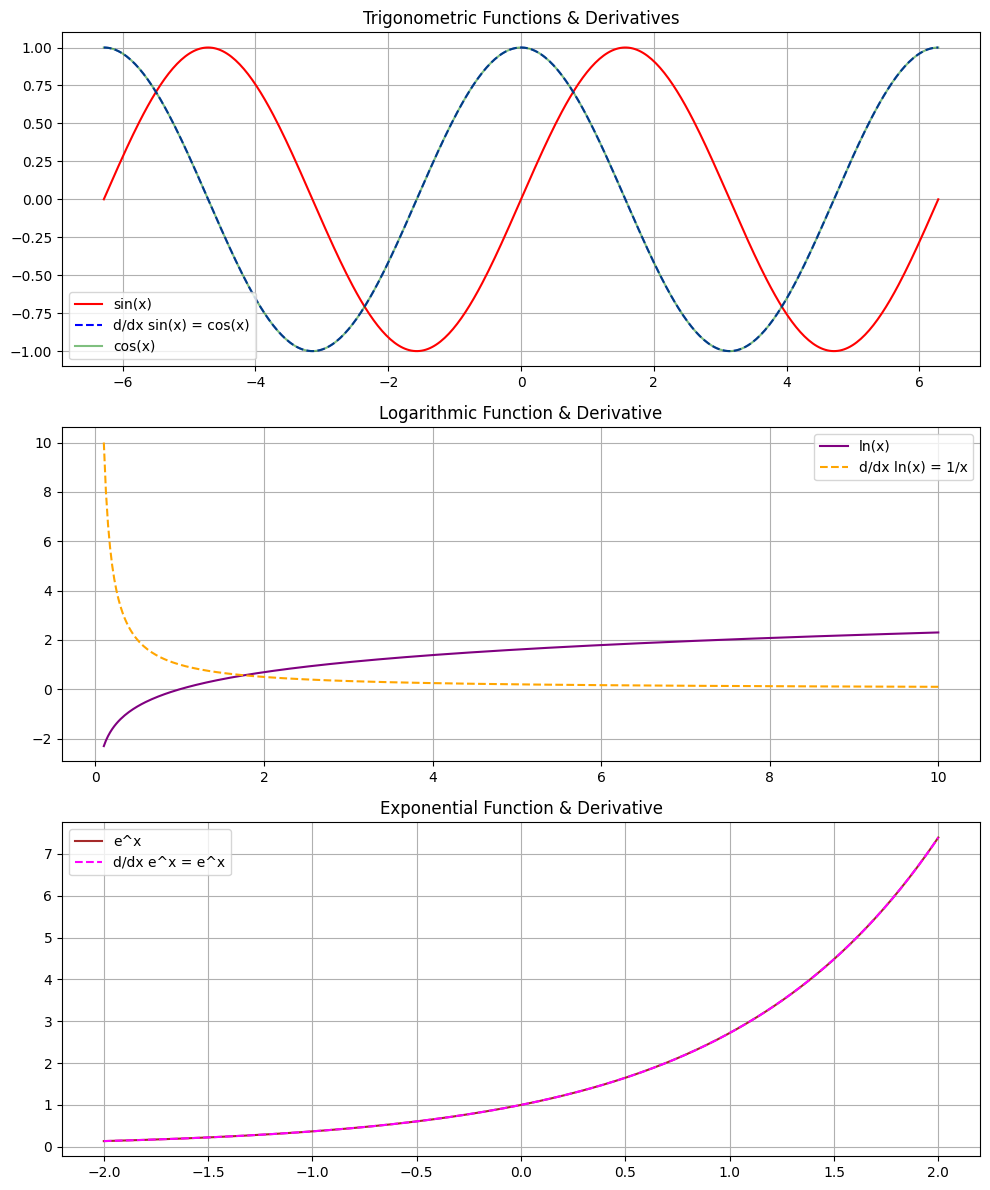

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define x values
x_trig = np.linspace(-2*np.pi, 2*np.pi, 400)
x_log = np.linspace(0.1, 10, 400)
x_exp = np.linspace(-2, 2, 400)

# Trigonometric functions and their derivatives
sin_x = np.sin(x_trig)
cos_x = np.cos(x_trig)
cos_x_derivative = np.cos(x_trig)
neg_sin_x_derivative = -np.sin(x_trig)

# Logarithmic function and derivative
log_x = np.log(x_log)
log_x_derivative = 1/x_log

# Exponential function and derivative
exp_x = np.exp(x_exp)
exp_x_derivative = np.exp(x_exp)

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Trigonometric plot
axs[0].plot(x_trig, sin_x, label='sin(x)', color='red')
axs[0].plot(x_trig, cos_x_derivative, label="d/dx sin(x) = cos(x)", color='blue', linestyle='--')
axs[0].plot(x_trig, np.cos(x_trig), label='cos(x)', color='green', alpha=0.5)
axs[0].set_title('Trigonometric Functions & Derivatives')
axs[0].legend()
axs[0].grid(True)

# Logarithmic plot
axs[1].plot(x_log, log_x, label='ln(x)', color='purple')
axs[1].plot(x_log, log_x_derivative, label="d/dx ln(x) = 1/x", color='orange', linestyle='--')
axs[1].set_title('Logarithmic Function & Derivative')
axs[1].legend()
axs[1].grid(True)

# Exponential plot
axs[2].plot(x_exp, exp_x, label='e^x', color='brown')
axs[2].plot(x_exp, exp_x_derivative, label="d/dx e^x = e^x", color='magenta', linestyle='--')
axs[2].set_title('Exponential Function & Derivative')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()


## Product Rule in Derivatives

* **Definition:** When differentiating a product of two functions $h(x)$ and $f(x)$, the derivative is given by:

$$
\frac{d}{dx}[h(x) \cdot f(x)] = h'(x) \cdot f(x) + h(x) \cdot f'(x)
$$

* **Steps to apply:**

  1. Take the derivative of the first function and multiply it by the second function as it is.
  2. Add the first function as it is multiplied by the derivative of the second function.

* **Example 1:**

$$
\frac{d}{dx}[x^2 \cos x] = 2x \cos x - x^2 \sin x
$$

* **Example 2 (Assignment):**

$$
f(x) = 4x^2, \quad g(x) = \sin x
$$

* Find $\frac{d}{dx}[4x^2 \sin x]$ using the product rule.

* **Key Note:**
  Understanding the product rule is important even if you are mainly coding in data science, as derivatives are widely used in areas like **deep learning**. The upcoming topic will be the **Chain Rule**, which is crucial for deep learning applications.

## Chain Rule of Derivatives

* **Importance:**

  * Essential in **differential calculus**.
  * Widely used in **deep learning and machine learning** (e.g., backpropagation for updating weights).

---

### Definition:

* **Chain Rule:** Used to differentiate a **composite function** (a function inside another function).
* If:

  $$
  y = f(g(x))
  $$

  Then:

  $$
  \frac{dy}{dx} = f'(g(x)) \cdot g'(x)
  $$

---

### Steps to Apply Chain Rule:

1. **Identify outer and inner functions.**
2. Differentiate the **outer function** with respect to the inner variable.
3. Differentiate the **inner function** with respect to $x$.
4. Multiply both derivatives.

---

### Examples:

**Example 1:**

$$
y = (3x^2 + 2x + 1)^5
$$

* Outer function: $f(u) = u^5$
* Inner function: $g(x) = 3x^2 + 2x + 1$
* Derivatives:

  * $f'(u) = 5u^4$
  * $g'(x) = 6x + 2$
* Final:

  $$
  \frac{dy}{dx} = 5(3x^2 + 2x + 1)^4 \cdot (6x + 2)
  $$

---

**Example 2:**

$$
y = \sin(4x^3 + x)
$$

* Outer function: $f(u) = \sin u \quad \Rightarrow f'(u) = \cos u$
* Inner function: $g(x) = 4x^3 + x \quad \Rightarrow g'(x) = 12x^2 + 1$
* Final:

  $$
  \frac{dy}{dx} = \cos(4x^3 + x) \cdot (12x^2 + 1)
  $$

---

**Key Idea**

* To differentiate a **composite function**:

  * Differentiate the **outer function** (keeping inner function as is).
  * Multiply by the **derivative of the inner function**.
* This concept mirrors dependencies in **neural networks** where outputs depend on previous layers.



### Chain Rule for Three Functions

* **Extension of Chain Rule:**

  * Previously applied to **two functions** (outer & inner).
  * Now applied to **three (or more) functions**.
  * Concept extends naturally to **n composite functions**.

---

### Example Function:

$$
y = \sqrt{\sin(3x)}
$$

* **Step 1: Identify functions**

  * Outer: $f(u) = \sqrt{u} = u^{1/2}$
  * Middle: $g(v) = \sin v$
  * Inner: $h(x) = 3x$

* **Step 2: Differentiate each**

  * $f'(u) = \frac{1}{2\sqrt{u}}$
  * $g'(v) = \cos v$
  * $h'(x) = 3$

* **Step 3: Apply Chain Rule**

$$
\frac{dy}{dx} = f'(g(h(x))) \cdot g'(h(x)) \cdot h'(x)
$$

* **Step 4: Substitute values**

$$
\frac{dy}{dx} = \frac{1}{2\sqrt{\sin(3x)}} \cdot \cos(3x) \cdot 3
$$

* **Final Result:**

$$
\frac{dy}{dx} = \frac{3\cos(3x)}{2\sqrt{\sin(3x)}}
$$

---

### Key Insight:

* **Chain Rule = Dependencies**

  * $x \to v \to u \to y$
  * Differentiate step by step, multiply results.
* Works for **any number of nested functions**.

---

### Conclusion:

* The chain rule is a **powerful tool** for differentiating complex, nested functions.
* Essential for **deep learning & neural networks** (backpropagation relies heavily on it).
* Understanding it helps bridge **calculus** with **machine learning applications**.